<a href="https://colab.research.google.com/github/dndprln/Praktikum-Data-Mining/blob/main/Checkpoint_(5)_Evaluation_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Review Kosmetik dan Produk Kecantikan - Top Brand**

#**Import Library**

In [88]:
## IMPORT LIBRARY

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

**Library untuk Splitting Data**

In [89]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [90]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memberikan peninjauan menyeluruh terhadap kosmetik dan produk kecantikan dari merek-merek terkemuka yaitu seperti seperti Olay, Nivea, NYX Professional Makeup, Maybelline New York, Lakme, L'Oreal Paris, dll dengan memahami review, preferensi, dan rating pembeli dari merek-merek tersebut, tujuan utamanya adalah untuk memberikan wawasan yang berguna kepada konsumen dalam memilih produk kecantikan yang sesuai dengan kebutuhan dan preferensi mereka.

##**Assess Situation**

#####Situasi bisnis yang mendasari analisis ini adalah permintaan yang semakin tinggi dan persaingan yang semakin sengit dalam sektor kosmetik dan produk kecantikan menandakan bahwa konsumen kini lebih selektif dalam memilih produk yang mereka gunakan. Merek-merek ternama memegang peran penting dalam membentuk tren dan standar kecantikan saat ini. Oleh karena itu, tinjauan terhadap merek-merek terkemuka menjadi sangat penting untuk memahami posisi produk dan tren yang tengah berkembang dalam industri ini.

##**Data Mining Goals**

#####Tujuan dari Data Mining pada Dataset ini adalah untuk mengenali arah tren produk dan preferensi konsumen yang berkaitan dengan merek-merek tersebut, mengidentifikasi pola-pola terkait kualitas produk dan tanggapan konsumen terhadap merek-merek tersebut, serta memberikan pemahaman yang berguna bagi konsumen dalam mengambil keputusan saat membeli produk.

##**Project Plan**

#####Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan informasi produk, ulasan dan rating pembeli dari merek-merek terkemuka tersebut, kemudian menyaring dan membersihkan data untuk memastikan keakuratan, terakhir yaitu meninjau kembali semua tahapan analisis untuk memverifikasi keakuratan dan relevansi hasil. Dengan melakukan langkah-langkah ini, diharapkan dapat memberikan pemahaman yang berharga kepada konsumen dan pihak terkait lainnya tentang tren produk dan preferensi konsumen dalam industri kosmetik dan produk kecantikan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data dengan judul "Review Kosmetik dan Produk Kecantikan - Top Brand" berasal dari Kaggle. Ini merupakan kumpulan data yang berisi ulasan data produk Kosmetik & Kecantikan merek ternama di https://www.nykaa.com/

Data diambil dari merek ternama seperti Olay, Nivea, NYX Professional Makeup, Maybelline New York, Lakme, L'Oreal Paris, dll.


Link: https://www.kaggle.com/datasets/jithinanievarghese/cosmetics-and-beauty-products-reviews-top-brands/data

In [92]:
# Masukkan data dari URL ke dalam variabel df
df = pd.read_csv("https://raw.githubusercontent.com/dndprln/Praktikum-Data-Mining/main/Checkpoint%201/nyka_top_brands_cosmetics_product_reviews.csv")

# Tampilkan beberapa baris pertama dari DataFrame
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


##**Describe Data**

####Informasi Dasar

In [93]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 61284
Jumlah kolom: 18


Memiliki 18 kolom yang terdiri dari product_id, brand_name, review_id, review_title, review_text, author, review_date, review_rating, is_a_buyer, pro_user, review_label, product_title, mrp, price, product_rating, product_rating_count, product_tags, dan product_url

Dan memiliki 61.284 baris yang menampilkan ulasan produk-produk dari Olay, Nivea, NYX Professional Makeup, Maybelline New York, Lakme, L'Oreal Paris, dll.

####Informasi Lanjutan

In [94]:
# Menampilkan informasi lengkap tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61276 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

1. product_id = ID unik untuk setiap produk, tipe datanya adalah int64 (tipe data untuk angka bulat (integer)).
2. brand_name: Nama merek produk, tipe datanya adalah object (tipe data untuk teks atau string).
3. review_id: ID unik untuk setiap ulasan, tipe datanya adalah int64 (tipe data untuk angka bulat (integer)).
4. review_title: Judul ulasan, tipe datanya adalah object (tipe data untuk teks atau string).
5. review_text: Isi dari ulasan, tipe datanya adalah object (tipe data untuk teks atau string).
6. author: Nama pengarang ulasan, tipe datanya adalah object (tipe data untuk teks atau string).
7. review_date: Tanggal ulasan, tipe datanya adalah object (tipe data untuk teks atau string).
8. review_rating: Penilaian ulasan,  tipe datanya adalah float64 (tipe data untuk angka desimal, digunakan untuk kolom yang berisi nilai numerik dengan pecahan).
9. is_a_buyer: berisi apakah pengulas adalah pembeli produk tersebut, tipe datanya adalah bool (tipe data untuk nilai boolean yang hanya dapat memiliki dua nilai: True atau False, digunakan untuk kolom yang menyatakan kebenaran atau keaslian suatu kondisi).
10. pro_user: berisi apakah pengulas adalah pengguna profesional, tipe datanya adalah bool (tipe data untuk nilai boolean yang hanya dapat memiliki dua nilai: True atau False, digunakan untuk kolom yang menyatakan kebenaran atau keaslian suatu kondisi).
11. review_label: Label atau kategori ulasan (tidak tersedia untuk semua ulasan), tipe datanya adalah object (tipe data untuk teks atau string).
12. product_title: Judul produk, tipe datanya adalah object (tipe data untuk teks atau string).
13. mrp: Harga ritel yang disarankan oleh produsen (MRP), tipe datanya adalah int64 (tipe data untuk angka bulat (integer)).
14. price: Harga jual produk, tipe datanya adalah int64 (tipe data untuk angka bulat (integer)).
15. product_rating: Rating produk, tipe datanya adalah float64 (tipe data untuk angka desimal, digunakan untuk kolom yang berisi nilai numerik dengan pecahan).
16. product_rating_count: Jumlah ulasan produk, tipe datanya adalah int64 (tipe data untuk angka bulat (integer)).
17. product_tags: Tag atau label produk (tidak tersedia untuk semua produk), tipe datanya adalah object (tipe data untuk teks atau string).
18. product_url: URL atau Link produk, tipe datanya adalah object (tipe data untuk teks atau string).

Dari informasi di atas, kita dapat melihat bahwa dataset terdiri dari 18 kolom. Beberapa kolom memiliki nilai null, seperti review_text, review_rating, review_label, dan product_tags. Dan juga, terdapat berbagai jenis data yang termasuk dalam dataset, seperti int64, object, dan bool.

####Informasi Statistik Deskriptif

In [95]:
# Menampilkan statistik deskriptif dari kolom numerik
df.describe()

,product_id,review_id,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,6.128400e+04,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,1.484995e+07,4.414781,573.260247,462.129512,4.099130,7582.963840
std,1.281418e+06,7.383506e+06,1.062547,324.098930,264.876964,0.235945,14463.246136
min,2.500000e+02,9.600000e+01,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102373e+07,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525142e+07,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002927e+07,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,5.000000,3874.000000,2947.000000,4.800000,98477.000000


1. product_id:
- count: Ada 61.284 entri dalam kolom ini.
- mean: Rata-rata dari semua product_id adalah sekitar 798.380.
- std: Standar deviasi dari product_id adalah sekitar 1.281.418.
- min: Nilai terkecil dari product_id adalah 250.
- 25%: Kuartil bawah dari product_id adalah sekitar 160.488.
- 50%: Median dari product_id adalah sekitar 452.443.
- 75%: Kuartil atas dari product_id adalah sekitar 766.529.
- max: Nilai terbesar dari product_id adalah sekitar 7.749.427.

2. review_id:
- count: Ada 61.284 entri dalam kolom ini.
- mean: Rata-rata dari semua review_id adalah sekitar 798.380.
- std: Standar deviasi dari review_id adalah sekitar 1.281.418.
- min: Nilai terkecil dari review_id adalah 250.
- 25%: Kuartil bawah dari review_id adalah sekitar 160.488.
- 50%: Median dari review_id adalah sekitar 452.443.
- 75%: Kuartil atas dari review_id adalah sekitar 766.529.
- max: Nilai terbesar dari review_id adalah sekitar 7.749.427.

3. review_rating:
- count: Ada 61.283 entri dalam kolom ini.
- mean: Rata-rata review_rating adalah sekitar 4.41.
- std: Standar deviasi review_rating adalah sekitar 1.06.
- min: Nilai terendah review_rating adalah 1.0.
- 25%: Kuartil bawah review_rating adalah 4.0.
- 50%: Median review_rating adalah 5.0.
- 75%: Kuartil atas review_rating adalah 5.0.
- max: Nilai tertinggi review_rating adalah 5.0.

4. mrp:
- count: Ada 61.283 entri dalam kolom ini.
- mean: Rata-rata mrp adalah sekitar 4.41.
- std: Standar deviasi mrp adalah sekitar 1.06.
- min: Nilai terendah mrp adalah 1.0.
- 25%: Kuartil bawah mrp adalah 4.0.
- 50%: Median mrp adalah 5.0.
- 75%: Kuartil atas mrp adalah 5.0.
- max: Nilai tertinggi mrp adalah 5.0.

5. price:
- count: Ada 61.283 entri dalam kolom ini.
- mean: Rata-rata price adalah sekitar 4.41.
- std: Standar deviasi price adalah sekitar 1.06.
- min: Nilai terendah price adalah 1.0.
- 25%: Kuartil bawah price adalah 4.0.
- 50%: Median price adalah 5.0.
- 75%: Kuartil atas price adalah 5.0.
- max: Nilai tertinggi price adalah 5.0.

6. product_rating:
- count: Ada 61.283 entri dalam kolom ini.
- mean: Rata-rata product_rating adalah sekitar 4.41.
- std: Standar deviasi product_rating adalah sekitar 1.06.
- min: Nilai terendah product_rating adalah 1.0.
- 25%: Kuartil bawah product_rating adalah 4.0.
- 50%: Median product_rating adalah 5.0.
- 75%: Kuartil atas product_rating adalah 5.0.
- max: Nilai tertinggi product_rating adalah 5.0.

7. product_rating_count:
- count: Ada 61.283 entri dalam kolom ini.
- mean: Rata-rata review_rating adalah sekitar 4.41.
- std: Standar deviasi review_rating adalah sekitar 1.06.
- min: Nilai terendah review_rating adalah 1.0.
- 25%: Kuartil bawah review_rating adalah 4.0.
- 50%: Median review_rating adalah 5.0.
- 75%: Kuartil atas review_rating adalah 5.0.
- max: Nilai tertinggi review_rating adalah 5.0.

##**Exploratory Data Analysis**

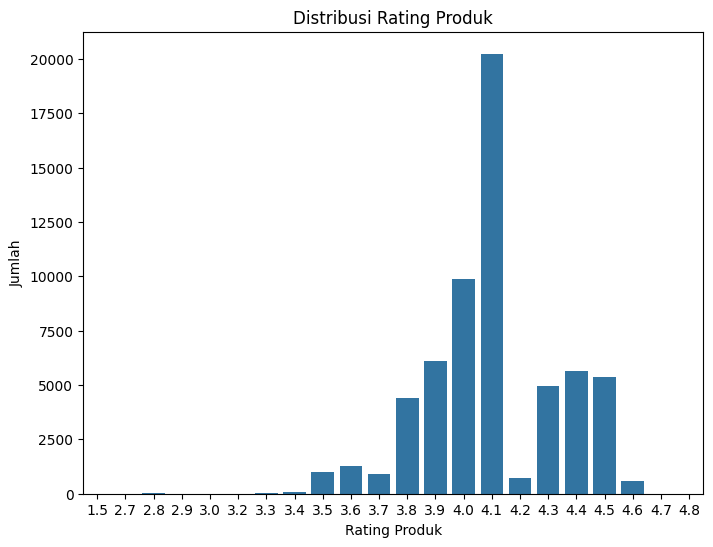

In [96]:
# Menampilkan distribusi rating produk
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='product_rating', data=df)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating Produk')
plt.ylabel('Jumlah')
plt.show()

Dapat dilihat dari visualisasi diatas, bahwa product_rating tertinggi berada di nilai 4.2 dan product_rating terendah berada di nilai 3.3.

Dapat di asumsikan bahwa nilai pada kolom review_rating tidak berpengaruh untuk nilai kolom product_rating, karena seberapa pun nilai yang diberikan di review_rating, maka hasil nilai dari product_rating tidak berubah

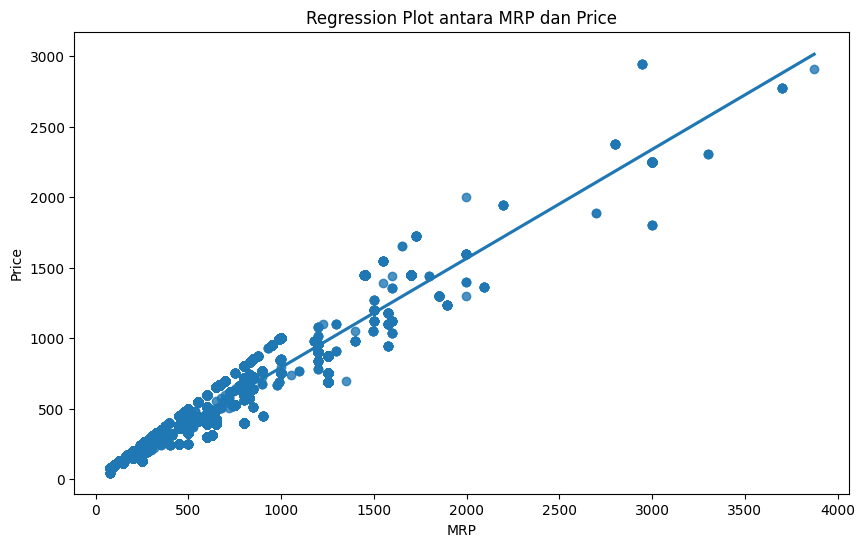

In [97]:
# Menampilkan regression plot antara 'mrp' dan 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='mrp', y='price', data=df)
plt.title('Regression Plot antara MRP dan Price')
plt.xlabel('MRP')
plt.ylabel('Price')
plt.show()

Dari Regression plot yg telah ditampilkan dapat ditarik kesimpulan bahwa perbandingan antara mrp dan price semakin kecil nilainya maka memiliki kecenderungan nilai-nilai rentang yang wajar. Sedangkan semakin besar nilainya maka memiliki kecenderungan nilai-nilai yang secara signifikan berbeda dari yang lain

<ipython-input-98-eab9559bc852>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



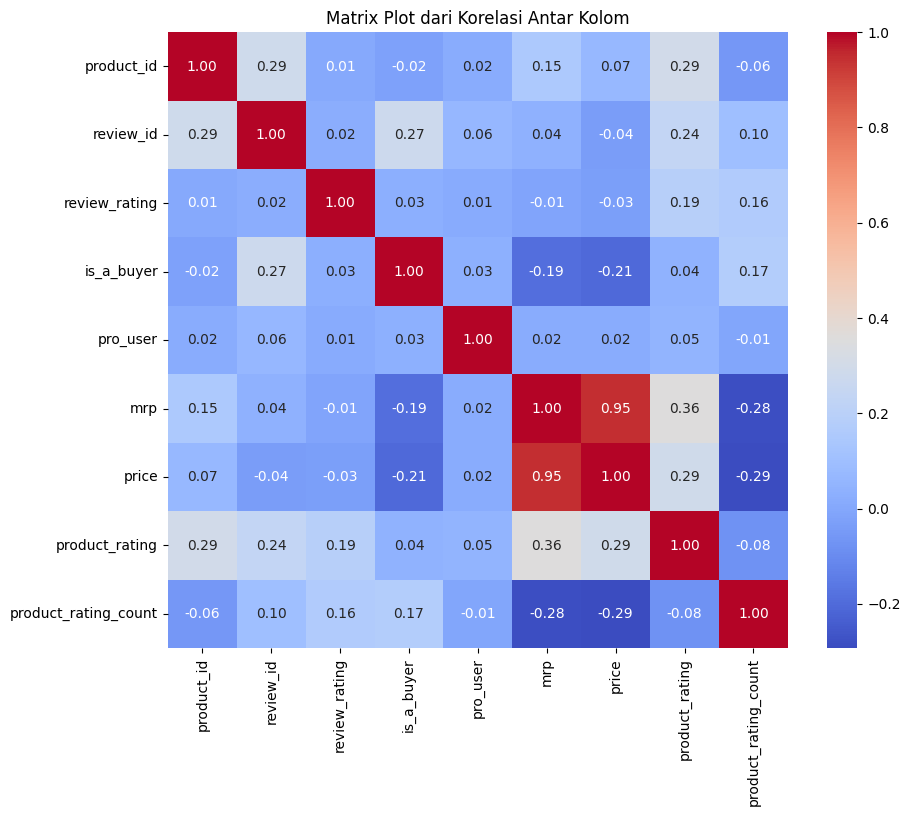

In [98]:
# Menghitung korelasi antara kolom-kolom numerik dalam dataset
correlation_matrix = df.corr()

# Menampilkan matrix plot (heatmap) dari korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Plot dari Korelasi Antar Kolom')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa warna merah artinya tingkat korelasinya tinggi, dan warna biru artinya tingkat korelasinya rendah.

##**Verify Data Quality**

####Missing Values

In [99]:
# Mengecek apakah ada nilai kosong pada tiap kolom
missing_values = df.isnull().sum()
print("\nNilai Kosong dalam Setiap Kolom:")
print(missing_values)


Nilai Kosong dalam Setiap Kolom:
product_id                  0
brand_name                  0
review_id                   0
review_title                0
review_text                 8
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label            13035
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
dtype: int64


1. review_text: Ada 8 nilai kosong dalam kolom ini. Ini berarti ada 8 entri di mana teks ulasan tidak diisi atau tidak tersedia.

2. review_rating: Ada 1 nilai kosong dalam kolom ini. Ini menunjukkan bahwa ada satu entri di mana rating ulasan tidak diisi atau tidak tersedia.

3. review_label: Ada 13.035 nilai kosong dalam kolom ini. Ini menunjukkan bahwa ada 13.035 entri di mana label ulasan (misalnya "Verified Buyer") tidak diisi atau tidak tersedia.

4. product_tags: Ada 47.782 nilai kosong dalam kolom ini. Ini menunjukkan bahwa ada 47.782 entri di mana tag produk tidak diisi atau tidak tersedia.

####Outliers Values

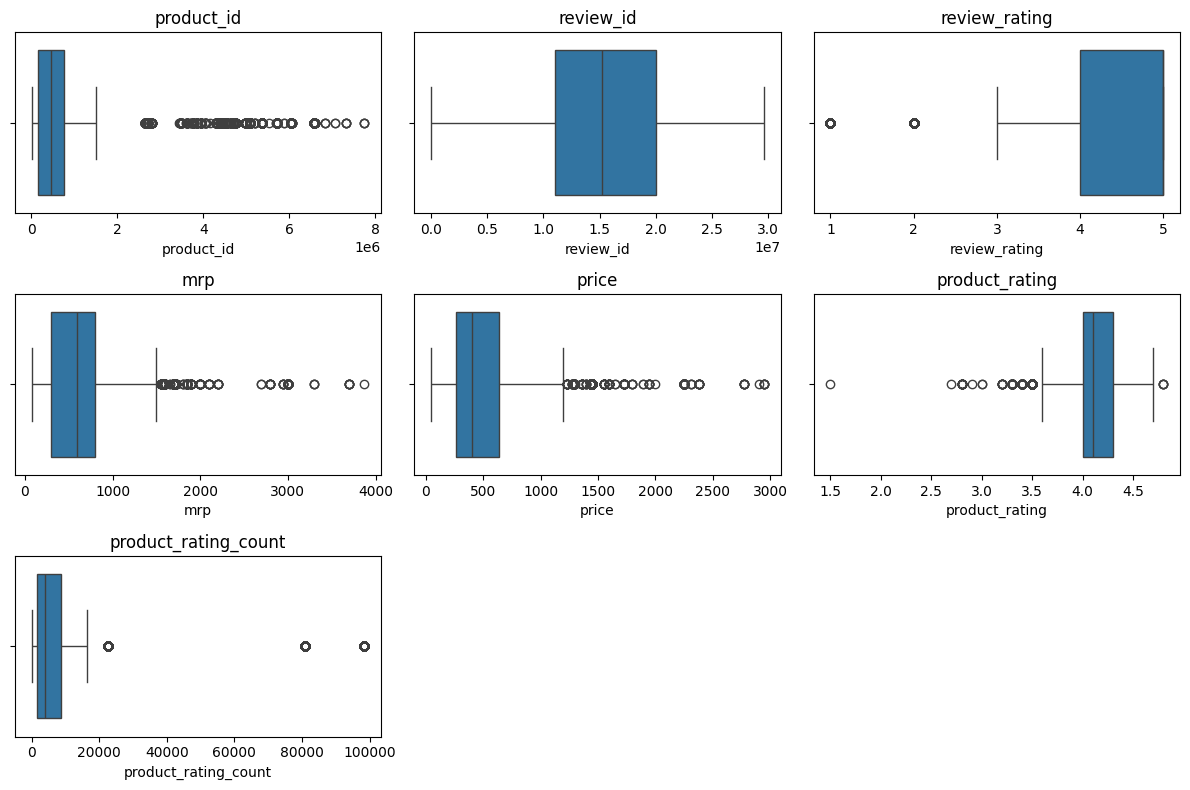

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan visualisasi dengan box plot untuk setiap kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df[column], orient='h')
    plt.title(column)
plt.tight_layout()
plt.show()

Dapat dilihat dari visualisasi diatas bahwa tidak ada outliers yang ditemukan daldam dataset ini karena nilai-nilai terdistribusi dalam rentang yang wajar dan tidak ada nilai yang secara signifikan berbeda dari yang lain

####Duplicated Values

In [101]:
# Memeriksa keberadaan nilai duplikat pada tiap kolom
duplicate_values = df.duplicated()
print("\nNilai Duplikat dalam Setiap Kolom:")
print(duplicate_values.sum())


Nilai Duplikat dalam Setiap Kolom:
0


Tidak ada nilai duplikat yang ditemukan pada tiap kolom dalam dataset. Dengan kata lain, setiap baris dianggap sebagai entitas unik dalam dataset.

####Inconsistent Values / Noise (Optional)

In [102]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

# Memeriksa tipe data setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)

# Memeriksa rentang nilai dari setiap kolom
print("\nRentang Nilai Setiap Kolom:")
print(df.describe(include='all'))


Tipe Data Setiap Kolom:
product_id                int64
brand_name               object
review_id                 int64
review_title             object
review_text              object
author                   object
review_date              object
review_rating           float64
is_a_buyer                 bool
pro_user                   bool
review_label             object
product_title            object
mrp                       int64
price                     int64
product_rating          float64
product_rating_count      int64
product_tags             object
product_url              object
dtype: object

Rentang Nilai Setiap Kolom:
          product_id       brand_name     review_id review_title review_text  \
count   6.128400e+04            61284  6.128400e+04        61284       61276   
unique           NaN               11           NaN        29559       59832   
top              NaN  Nykaa Cosmetics           NaN         Good        Good   
freq             NaN            1765

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [103]:
print((df.isna().sum() / len(df)) * 100)

product_id               0.000000
brand_name               0.000000
review_id                0.000000
review_title             0.000000
review_text              0.013054
author                   0.000000
review_date              0.000000
review_rating            0.001632
is_a_buyer               0.000000
pro_user                 0.000000
review_label            21.269826
product_title            0.000000
mrp                      0.000000
price                    0.000000
product_rating           0.000000
product_rating_count     0.000000
product_tags            77.968148
product_url              0.000000
dtype: float64


Nilai Kosong Pada Kolom Cabin

In [104]:
df[df['product_tags'].isnull()]

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61055,1044491,Herbal Essences,17789484,Best hair conditioner,Wow this herbal essence aloe vera and bamboo c...,Sourav kitchens,2021-04-13 16:19:52,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Bamboo Conditioner Soft...,825,578,4.4,467,NaN,https://www.nykaa.com/herbal-essences-potent-a...
61056,1044491,Herbal Essences,17787901,Good results,I am using this after shampooing my hair with ...,Priyanka Yadav,2021-04-13 14:54:10,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Bamboo Conditioner Soft...,825,578,4.4,467,NaN,https://www.nykaa.com/herbal-essences-potent-a...
61057,1044491,Herbal Essences,17784844,Nourishing Hair Conditioner,This conditioner has worked so well for my dry...,ADITI KHARE,2021-04-13 12:31:17,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Bamboo Conditioner Soft...,825,578,4.4,467,NaN,https://www.nykaa.com/herbal-essences-potent-a...
61058,1044491,Herbal Essences,17777146,Best Conditioner,After using Herbal Essence Shampoo Potent Aloe...,Tanya Bhutani,2021-04-12 20:49:48,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Bamboo Conditioner Soft...,825,578,4.4,467,NaN,https://www.nykaa.com/herbal-essences-potent-a...


Nilai kosong pada kolom review_label

In [105]:
df[df['review_label'].isnull()]

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
6,739418,Olay,16531371,All time favorite,"This cream is just awesome, It makes my rough ...",Priyanka Barwal,2021-01-06 15:43:25,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
7,739418,Olay,21356560,"""Good Product """,Instantly perfect skin tone appearance.,Bandana Mukherjee,2021-11-13 19:57:06,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
8,739418,Olay,15235570,Good eye cream combo,This eye cream combo is effective. Works on fi...,krish,2020-10-19 15:08:13,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
9,739418,Olay,22008691,"""Olay''","3in1 benifits, helps reduces dark spots and wr...",Gargi Mukherjee,2021-12-16 14:55:52,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
10,739418,Olay,23018268,Must try,Amazing combo from olay absolutely worth it,Sharmistha Paul,2022-02-18 17:11:40,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61173,1044490,Herbal Essences,26365252,not happy😒,It is making my hair so dry even after applyin...,Aditi Chaudhary,2022-07-05 12:03:51,2.0,False,False,NaN,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61174,1044490,Herbal Essences,29629224,Amazing,Very good shampoo. It is not very foamy and th...,Saheli Chakraborty,2022-10-22 17:30:26,5.0,False,False,NaN,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61175,1044490,Herbal Essences,29626328,Amazing,Very good shampoo. It is not very foamy and th...,Bulu Chakraborty,2022-10-22 16:06:00,5.0,False,False,NaN,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61176,1044490,Herbal Essences,29620119,Amazing,Very good shampoo. It is not very foamy and th...,saheli chakraborty,2022-10-22 13:07:04,5.0,False,False,NaN,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...


Nilai kosong pada kolom review_text

In [106]:
df[df['review_text'].isnull()]

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
5470,564436,Nykaa Cosmetics,22242576,Excellent product for,NaN,lipika gharami,2022-01-01 13:57:46,5.0,True,False,Verified Buyer,Nykaa Lash Talk False Eyelash - Major Length,199,149,3.9,11381,NaN,https://www.nykaa.com/nykaa-lash-talk-major-le...
6224,551016,Nykaa Cosmetics,19113046,Its just perfect,NaN,Aisha Roy,2021-06-22 19:04:48,5.0,True,False,Verified Buyer,Nykaa Strobe & Glow Liquid Highlighter,699,559,4.1,8720,NaN,https://www.nykaa.com/nykaa-strobe-glow-liquid...
36204,1139,Lakme,20752769,Super,NaN,Kayalvizhi S,2021-10-05 20:07:01,5.0,True,False,Verified Buyer,Lakme True Wear Nail Color,125,125,4.1,11663,NaN,https://www.nykaa.com/lakme-true-wear-nail-col...
36430,1139,Lakme,19379470,Love it,NaN,Anindita Haldar,2021-07-11 16:44:53,4.0,True,False,Verified Buyer,Lakme True Wear Nail Color,125,125,4.1,11663,NaN,https://www.nykaa.com/lakme-true-wear-nail-col...
50371,5093150,Kay Beauty,24926826,Cosy coral,NaN,Stuti Gupta,2022-05-12 01:59:00,4.0,True,False,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,"FEATURED, BESTSELLER",https://www.nykaa.com/kay-beauty-creme-blush-s...
50396,5093150,Kay Beauty,24643028,Sweetheart pink,NaN,Stuti Gupta,2022-05-06 16:13:03,4.0,True,False,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,"FEATURED, BESTSELLER",https://www.nykaa.com/kay-beauty-creme-blush-s...
52323,1229442,Kay Beauty,21445677,Loved it,NaN,priyanka daimary,2021-11-19 21:14:03,5.0,True,False,Verified Buyer,Kay Beauty Hydrating Foundation,1200,900,4.4,4577,"FEATURED, BESTSELLER",https://www.nykaa.com/kay-beauty-hydrating-fou...
54178,1080669,Kay Beauty,24260037,Damn good product,NaN,Ankita S,2022-04-23 15:06:14,4.0,True,False,Verified Buyer,Kay Beauty Matte Blush,799,639,4.5,4619,NaN,https://www.nykaa.com/kay-beauty-matte-blush/p...


Nilai kosong pada kolom review_rating

In [107]:
df[df['review_rating'].isnull()]

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
21576,41880,NYX Professional Makeup,6090530,Vintage.,"Hello beauties, I am here to help you out whet...",Swati,2019-07-21 19:16:25,NaN,True,False,Verified Buyer,NYX Professional Makeup Liquid Suede Cream Lip...,850,850,4.0,1191,NaN,https://www.nykaa.com/nyx-professional-makeup-...


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom ***product_tags*** lebih dari 70%, maka kolom tersebut wajib untuk dihapus

In [108]:
df = df.drop('product_tags', axis=1)

In [109]:
df

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021-04-12 13:28:41,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,https://www.nykaa.com/herbal-essences-potent-a...
61280,1044490,Herbal Essences,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021-04-12 11:47:07,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,https://www.nykaa.com/herbal-essences-potent-a...
61281,1044490,Herbal Essences,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021-04-12 10:58:34,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,https://www.nykaa.com/herbal-essences-potent-a...
61282,1044490,Herbal Essences,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021-04-11 21:44:55,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,https://www.nykaa.com/herbal-essences-potent-a...


#####**Imputasi Missing Values**

Untuk kolom ***review_label***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***review_label***

In [110]:
df['review_label'].dropna().describe()

count              48249
unique                 2
top       Verified Buyer
freq               47790
Name: review_label, dtype: object

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil) untuk imputasi nilai kosong tersebut

In [111]:
df['review_label'] = df['review_label'].fillna(df['review_label'].mode()[0])

Untuk kolom ***review_text*** akan kita lakukan yang sama seperti pada kolom ***review_label***, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [112]:
df['review_text'].dropna().describe()

count     61276
unique    59832
top        Good
freq        134
Name: review_text, dtype: object

In [113]:
df['review_text'] = df['review_text'].fillna(df['review_text'].mode()[0])

Untuk kolom ***review_rating*** dapat menggunakan mean dari kolom ***review_rating*** untuk imputasi nilai kosong tersebut

In [114]:
df['review_rating'].dropna().describe()

count    61283.000000
mean         4.414781
std          1.062547
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64

In [115]:
df['review_rating'] = df['review_rating'].fillna(df['review_rating'].dropna().mean())

#####**Pengecekkan Ulang**

In [116]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
product_id,0.0
brand_name,0.0
review_id,0.0
review_title,0.0
review_text,0.0
author,0.0
review_date,0.0
review_rating,0.0
is_a_buyer,0.0
pro_user,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [117]:
df[df.duplicated()]

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url


#####**Hapus Nilai Duplikat**

In [118]:
df = df.drop_duplicates()

###**Penanganan Outliers**

Cara Penanganan:
- Jika presentasenya <= 5%, maka di hapus.
- alternatif lain dpt dilakukan, imputasi menggunakan metode flooring & capping serta analisis statistik dari kolom terkait
- Jika presentase outliers cukup tinggi dari 5% tersebut tidak mewakili atau tidak relevan dengan studi kasus, maka kolom tersebut dapat dihapus, dan jikalau relevan, maka diabaikan saja.


In [119]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
product_id,8.015143
review_id,0.000000
review_rating,7.824228
mrp,0.982312
price,1.096534
product_rating,1.879773
product_rating_count,3.978200


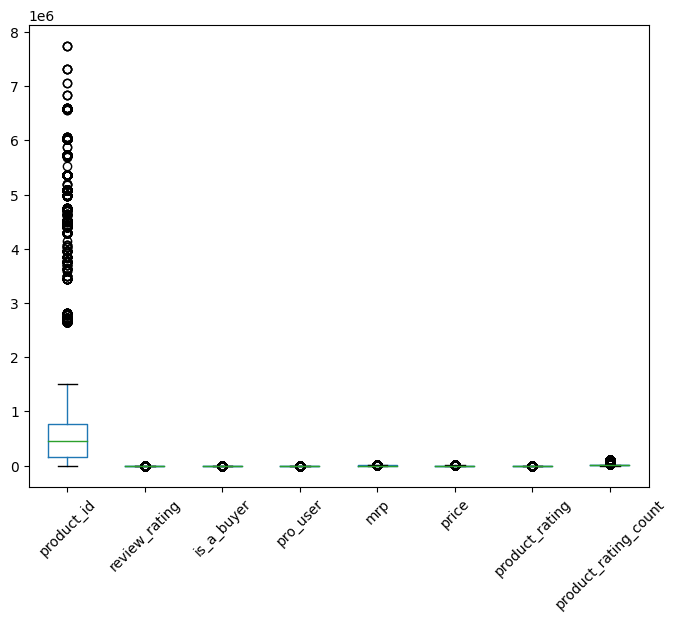

In [120]:
boxplot = df.drop('review_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Kolom yang perlu dihapus outliers nya yaitu mrp, price, dan product_rating_count

In [121]:
Q1 = df['mrp'].quantile(0.25)
Q3 = df['mrp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['mrp'] >= lower_bound) & (df['mrp'] <= upper_bound)]

In [122]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [123]:
Q1 = df['product_rating_count'].quantile(0.25)
Q3 = df['product_rating_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['product_rating_count'] >= lower_bound) & (df['product_rating_count'] <= upper_bound)]

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "Fare"

In [124]:
Q1 = df['product_rating'].quantile(0.25)
Q3 = df['product_rating'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['product_rating']=np.where(df['product_rating']>upper_whisker,upper_whisker,np.where(df['product_rating']<lower_whisker,lower_whisker,df['product_rating']))

#####**Pengecekkan Ulang**

In [125]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
product_id,8.349260
review_id,0.000000
review_rating,8.085817
mrp,0.000000
price,0.060265
product_rating,0.000000
product_rating_count,0.000000


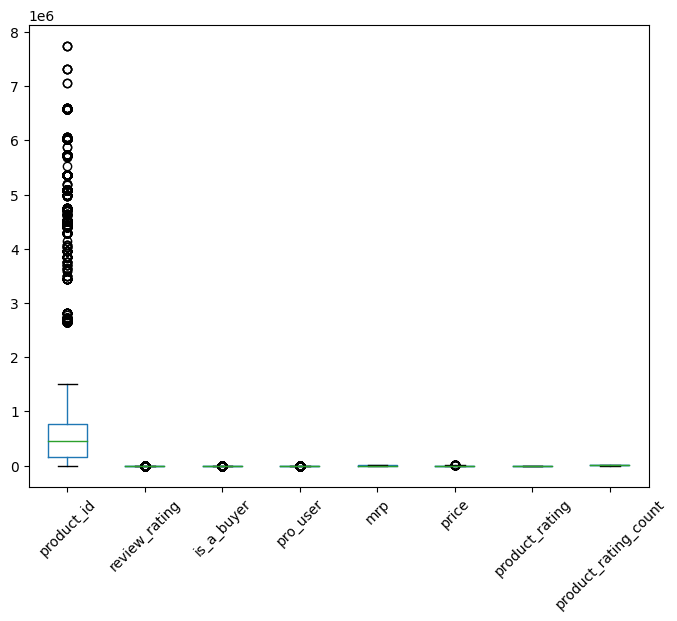

In [126]:
boxplot = df.drop('review_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

In [127]:
import pandas as pd

# Get a 10% random sample
sample = df.sample(frac=0.1, random_state=42)

print(sample)

sample.to_csv

       product_id               brand_name  review_id  \
34285      189912                    Lakme    1972337   
21921       41880  NYX Professional Makeup    4105209   
57396     5360837          Herbal Essences   23518186   
50363     5093150               Kay Beauty   27110335   
6661       551016          Nykaa Cosmetics   10593451   
...           ...                      ...        ...   
50359     5093150               Kay Beauty   26047799   
13040      286417          Nykaa Cosmetics   17381177   
30123         981                    Lakme   16346133   
23294      861356      Maybelline New York   20307108   
21160       42114  NYX Professional Makeup    1664062   

                       review_title  \
34285                       Okayish   
21921                         Good.   
57396                     Amazing!!   
50363                  My favourite   
6661                 Glazed- bronze   
...                             ...   
50359                  Good formula   
130

<bound method NDFrame.to_csv of        product_id               brand_name  review_id  \
34285      189912                    Lakme    1972337   
21921       41880  NYX Professional Makeup    4105209   
57396     5360837          Herbal Essences   23518186   
50363     5093150               Kay Beauty   27110335   
6661       551016          Nykaa Cosmetics   10593451   
...           ...                      ...        ...   
50359     5093150               Kay Beauty   26047799   
13040      286417          Nykaa Cosmetics   17381177   
30123         981                    Lakme   16346133   
23294      861356      Maybelline New York   20307108   
21160       42114  NYX Professional Makeup    1664062   

                       review_title  \
34285                       Okayish   
21921                         Good.   
57396                     Amazing!!   
50363                  My favourite   
6661                 Glazed- bronze   
...                             ...   
50359                  Good formula   
13040  A bit small but good quality   
30123                       Perfect   
23294                    great dupe   
21160        In the shade universal   

                                             review_text            author  \
34285  Nothing new in this foundation ..okiesh produc...      Vanita Bohra   
21921  I got one for free. Really liked it. Just don'...           Sunaina   
57396  Its a must buy, you will get 100 percentage of...      mallika jain   
50363                                  Really like it ❤️      Mahin Sohail   
6661         Best pigment in this range. Looks gorgeous.    Savita Purohit   
...                                                  ...               ...   
50359  It’s so easy to blend, very pigmented and beau...     manpreet kaur   
13040           Quality of pouch is good but a bit small         Neha Bais   
30123  This is a really good kajal.It lasts for long....            Anne.B   
23294           natural colour, easy to use and precise!    Khyati Kakwani   
21160  The texture is smooth and it blends easily giv...  priyanjali gupta   

               review_date  review_rating  is_a_buyer  pro_user  \
34285  2018-05-28 14:59:24            2.0        True     False   
21921  2019-01-22 07:48:22            4.0       False     False   
57396  2022-03-21 18:37:29            5.0        True     False   
50363  2022-07-30 19:45:11            4.0        True     False   
6661   2019-09-24 19:42:49            5.0        True     False   
...                    ...            ...         ...       ...   
50359  2022-06-22 20:33:28            4.0        True     False   
13040  2021-03-13 20:23:26            5.0        True     False   
30123  2020-12-22 22:00:39            5.0       False     False   
23294  2021-09-02 21:07:47            4.0        True     False   
21160  2018-04-26 09:32:18            5.0       False     False   

         review_label                                      product_title  mrp  \
34285  Verified Buyer  Lakme Absolute Argan Oil Serum Foundation With...  825   
21921  Verified Buyer  NYX Professional Makeup Liquid Suede Cream Lip...  850   
57396  Verified Buyer  Herbal Essences Argan Oil Of Morocco Shampoo -...  600   
50363  Verified Buyer                             Kay Beauty Creme Blush  799   
6661   Verified Buyer             Nykaa Strobe & Glow Liquid Highlighter  699   
...               ...                                                ...  ...   
50359  Verified Buyer                             Kay Beauty Creme Blush  799   
13040  Verified Buyer      Nykaa Metal Addict Makeup Bag - Blushing Gold  300   
30123  Verified Buyer                                Lakme Kajal - Black   75   
23294  Verified Buyer     Maybelline New York Define & Blend Brow Pencil  349   
21160  Verified Buyer               NYX Professional Makeup Wonder Stick  835   

       price  product_rating  product_rating_count  \
34285    660             4.1                 

Disini saya mengguna data sample untuk digunakan, karena dataset saya sendiri memiliki banyak baris dan kolom sehingga membuat colab kesusahan untuk mengakses dataset yang besar. Seperti terlihat dibawah ini, jumlah baris dan kolom sudah berkurang setelah dilakukan slicing data.

In [128]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

print("Jumlah baris:", sample.shape[0])
print("Jumlah kolom:", sample.shape[1])

Jumlah baris: 5808
Jumlah kolom: 17


In [129]:
sample

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url
34285,189912,Lakme,1972337,Okayish,Nothing new in this foundation ..okiesh produc...,Vanita Bohra,2018-05-28 14:59:24,2.0,True,False,Verified Buyer,Lakme Absolute Argan Oil Serum Foundation With...,825,660,4.1,2732,https://www.nykaa.com/lakme-absolute-argan-oil...
21921,41880,NYX Professional Makeup,4105209,Good.,I got one for free. Really liked it. Just don'...,Sunaina,2019-01-22 07:48:22,4.0,False,False,Verified Buyer,NYX Professional Makeup Liquid Suede Cream Lip...,850,850,4.0,1191,https://www.nykaa.com/nyx-professional-makeup-...
57396,5360837,Herbal Essences,23518186,Amazing!!,"Its a must buy, you will get 100 percentage of...",mallika jain,2022-03-21 18:37:29,5.0,True,False,Verified Buyer,Herbal Essences Argan Oil Of Morocco Shampoo -...,600,390,4.3,8769,https://www.nykaa.com/herbal-essences-argan-oi...
50363,5093150,Kay Beauty,27110335,My favourite,Really like it ❤️,Mahin Sohail,2022-07-30 19:45:11,4.0,True,False,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...
6661,551016,Nykaa Cosmetics,10593451,Glazed- bronze,Best pigment in this range. Looks gorgeous.,Savita Purohit,2019-09-24 19:42:49,5.0,True,False,Verified Buyer,Nykaa Strobe & Glow Liquid Highlighter,699,559,4.1,8720,https://www.nykaa.com/nykaa-strobe-glow-liquid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50359,5093150,Kay Beauty,26047799,Good formula,"It’s so easy to blend, very pigmented and beau...",manpreet kaur,2022-06-22 20:33:28,4.0,True,False,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...
13040,286417,Nykaa Cosmetics,17381177,A bit small but good quality,Quality of pouch is good but a bit small,Neha Bais,2021-03-13 20:23:26,5.0,True,False,Verified Buyer,Nykaa Metal Addict Makeup Bag - Blushing Gold,300,300,4.0,10935,https://www.nykaa.com/nykaa-metal-addict-makeu...
30123,981,Lakme,16346133,Perfect,This is a really good kajal.It lasts for long....,Anne.B,2020-12-22 22:00:39,5.0,False,False,Verified Buyer,Lakme Kajal - Black,75,75,4.1,6197,https://www.nykaa.com/lakme-kajal/p/981
23294,861356,Maybelline New York,20307108,great dupe,"natural colour, easy to use and precise!",Khyati Kakwani,2021-09-02 21:07:47,4.0,True,False,Verified Buyer,Maybelline New York Define & Blend Brow Pencil,349,295,3.9,2666,https://www.nykaa.com/maybelline-new-york-defi...


#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [130]:
def loyal_customers(pro_user):
    if pro_user == True:
        return 'Yes'
    elif pro_user == False:
        return 'No'
    else:
        return '-'

sample['loyal_customers'] = sample['pro_user'].apply(loyal_customers)

###**Pengecekkan Hasil**

In [131]:
sample.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url,loyal_customers
34285,189912,Lakme,1972337,Okayish,Nothing new in this foundation ..okiesh produc...,Vanita Bohra,2018-05-28 14:59:24,2.0,True,False,Verified Buyer,Lakme Absolute Argan Oil Serum Foundation With...,825,660,4.1,2732,https://www.nykaa.com/lakme-absolute-argan-oil...,No
21921,41880,NYX Professional Makeup,4105209,Good.,I got one for free. Really liked it. Just don'...,Sunaina,2019-01-22 07:48:22,4.0,False,False,Verified Buyer,NYX Professional Makeup Liquid Suede Cream Lip...,850,850,4.0,1191,https://www.nykaa.com/nyx-professional-makeup-...,No
57396,5360837,Herbal Essences,23518186,Amazing!!,"Its a must buy, you will get 100 percentage of...",mallika jain,2022-03-21 18:37:29,5.0,True,False,Verified Buyer,Herbal Essences Argan Oil Of Morocco Shampoo -...,600,390,4.3,8769,https://www.nykaa.com/herbal-essences-argan-oi...,No
50363,5093150,Kay Beauty,27110335,My favourite,Really like it ❤️,Mahin Sohail,2022-07-30 19:45:11,4.0,True,False,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...,No
6661,551016,Nykaa Cosmetics,10593451,Glazed- bronze,Best pigment in this range. Looks gorgeous.,Savita Purohit,2019-09-24 19:42:49,5.0,True,False,Verified Buyer,Nykaa Strobe & Glow Liquid Highlighter,699,559,4.1,8720,https://www.nykaa.com/nykaa-strobe-glow-liquid...,No


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [132]:
sample_corr = sample.corr(numeric_only=True)
px.imshow(sample_corr)

In [133]:
sample = sample.drop(['product_id', 'pro_user'], axis=1)

###**Pengecekkan Hasil**

In [134]:
sample.head()

,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url,loyal_customers
34285,Lakme,1972337,Okayish,Nothing new in this foundation ..okiesh produc...,Vanita Bohra,2018-05-28 14:59:24,2.0,True,Verified Buyer,Lakme Absolute Argan Oil Serum Foundation With...,825,660,4.1,2732,https://www.nykaa.com/lakme-absolute-argan-oil...,No
21921,NYX Professional Makeup,4105209,Good.,I got one for free. Really liked it. Just don'...,Sunaina,2019-01-22 07:48:22,4.0,False,Verified Buyer,NYX Professional Makeup Liquid Suede Cream Lip...,850,850,4.0,1191,https://www.nykaa.com/nyx-professional-makeup-...,No
57396,Herbal Essences,23518186,Amazing!!,"Its a must buy, you will get 100 percentage of...",mallika jain,2022-03-21 18:37:29,5.0,True,Verified Buyer,Herbal Essences Argan Oil Of Morocco Shampoo -...,600,390,4.3,8769,https://www.nykaa.com/herbal-essences-argan-oi...,No
50363,Kay Beauty,27110335,My favourite,Really like it ❤️,Mahin Sohail,2022-07-30 19:45:11,4.0,True,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...,No
6661,Nykaa Cosmetics,10593451,Glazed- bronze,Best pigment in this range. Looks gorgeous.,Savita Purohit,2019-09-24 19:42:49,5.0,True,Verified Buyer,Nykaa Strobe & Glow Liquid Highlighter,699,559,4.1,8720,https://www.nykaa.com/nykaa-strobe-glow-liquid...,No


#**Data Transformation**

###**Mapping**


In [135]:
sample['is_a_buyer'] = sample['is_a_buyer'].map({'True':1,'False':0})

###**Pengecekkan Hasil**

In [136]:
sample

,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url,loyal_customers
34285,Lakme,1972337,Okayish,Nothing new in this foundation ..okiesh produc...,Vanita Bohra,2018-05-28 14:59:24,2.0,NaN,Verified Buyer,Lakme Absolute Argan Oil Serum Foundation With...,825,660,4.1,2732,https://www.nykaa.com/lakme-absolute-argan-oil...,No
21921,NYX Professional Makeup,4105209,Good.,I got one for free. Really liked it. Just don'...,Sunaina,2019-01-22 07:48:22,4.0,NaN,Verified Buyer,NYX Professional Makeup Liquid Suede Cream Lip...,850,850,4.0,1191,https://www.nykaa.com/nyx-professional-makeup-...,No
57396,Herbal Essences,23518186,Amazing!!,"Its a must buy, you will get 100 percentage of...",mallika jain,2022-03-21 18:37:29,5.0,NaN,Verified Buyer,Herbal Essences Argan Oil Of Morocco Shampoo -...,600,390,4.3,8769,https://www.nykaa.com/herbal-essences-argan-oi...,No
50363,Kay Beauty,27110335,My favourite,Really like it ❤️,Mahin Sohail,2022-07-30 19:45:11,4.0,NaN,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...,No
6661,Nykaa Cosmetics,10593451,Glazed- bronze,Best pigment in this range. Looks gorgeous.,Savita Purohit,2019-09-24 19:42:49,5.0,NaN,Verified Buyer,Nykaa Strobe & Glow Liquid Highlighter,699,559,4.1,8720,https://www.nykaa.com/nykaa-strobe-glow-liquid...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50359,Kay Beauty,26047799,Good formula,"It’s so easy to blend, very pigmented and beau...",manpreet kaur,2022-06-22 20:33:28,4.0,NaN,Verified Buyer,Kay Beauty Creme Blush,799,799,4.5,2010,https://www.nykaa.com/kay-beauty-creme-blush-s...,No
13040,Nykaa Cosmetics,17381177,A bit small but good quality,Quality of pouch is good but a bit small,Neha Bais,2021-03-13 20:23:26,5.0,NaN,Verified Buyer,Nykaa Metal Addict Makeup Bag - Blushing Gold,300,300,4.0,10935,https://www.nykaa.com/nykaa-metal-addict-makeu...,No
30123,Lakme,16346133,Perfect,This is a really good kajal.It lasts for long....,Anne.B,2020-12-22 22:00:39,5.0,NaN,Verified Buyer,Lakme Kajal - Black,75,75,4.1,6197,https://www.nykaa.com/lakme-kajal/p/981,No
23294,Maybelline New York,20307108,great dupe,"natural colour, easy to use and precise!",Khyati Kakwani,2021-09-02 21:07:47,4.0,NaN,Verified Buyer,Maybelline New York Define & Blend Brow Pencil,349,295,3.9,2666,https://www.nykaa.com/maybelline-new-york-defi...,No


###**Mengubah Data Frame ke file CSV**

In [137]:
sample.to_csv('Data Cleaned.csv', index=False)

#**Modelling Predict**

###**Pre-Processing**

In [138]:
# menghitung jumlah nilai unik dalam suatu objek data

sample.nunique()

brand_name                10
review_id               5808
review_title            3826
review_text             5751
author                  5277
review_date             5808
review_rating              5
is_a_buyer                 0
review_label               2
product_title            162
mrp                       78
price                    107
product_rating            12
product_rating_count     148
product_url              162
loyal_customers            2
dtype: int64

Karena di data frame saya masih banyak nilai teks atau string, maka saya melakukan penghapusan kolom dan juga encoding data agar data yang dihasilkan berupa nilai numerik semua.

In [139]:
# Membuat Daftar Kolom yang Akan Dihapus
kolom_yang_dihapus = ['brand_name', 'review_date', 'review_title', 'review_text', 'author', 'product_title', 'product_url']

# Menghapus Kolom yang Tidak Diperlukan dari DataFrame
sample_baru = sample.drop(columns=kolom_yang_dihapus)

# Melakukan One-Hot Encoding untuk Variabel Kategorikal
is_a_buyer_encoded = pd.get_dummies(sample_baru['is_a_buyer'], prefix='is_a_buyer')
review_label_encoded = pd.get_dummies(sample_baru['review_label'], prefix='review_label')
loyal_customers_encoded = pd.get_dummies(sample_baru['loyal_customers'], prefix='loyal_customers')

# Menggabungkan DataFrame yang Sudah Di-Encoded
sample_encoded = pd.concat([sample_baru, is_a_buyer_encoded, review_label_encoded, loyal_customers_encoded], axis=1)

# Menghapus Kolom-Kolom Awal yang Sudah Di-Encoded
sample_encoded.drop(columns=['is_a_buyer', 'review_label', 'loyal_customers'], inplace=True)

- Langkah-langkahnya meliputi penghapusan kolom yang tidak diperlukan, one-hot encoding untuk variabel kategorikal, dan penggabungan serta penghapusan kolom-kolom yang telah di-encoded.
- One-hot encoding digunakan untuk mengubah variabel kategorikal menjadi representasi biner, di mana setiap kategori direpresentasikan sebagai kolom baru dengan nilai 0 atau 1.

In [140]:
sample_encoded

,review_id,review_rating,mrp,price,product_rating,product_rating_count,review_label_Verified Buyer,review_label_Verified Professional,loyal_customers_No,loyal_customers_Yes
34285,1972337,2.0,825,660,4.1,2732,1,0,1,0
21921,4105209,4.0,850,850,4.0,1191,1,0,1,0
57396,23518186,5.0,600,390,4.3,8769,1,0,1,0
50363,27110335,4.0,799,799,4.5,2010,1,0,1,0
6661,10593451,5.0,699,559,4.1,8720,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
50359,26047799,4.0,799,799,4.5,2010,1,0,1,0
13040,17381177,5.0,300,300,4.0,10935,1,0,1,0
30123,16346133,5.0,75,75,4.1,6197,1,0,1,0
23294,20307108,4.0,349,295,3.9,2666,1,0,1,0


In [141]:
# langkah untuk menghasilkan variabel baru yang memiliki isi yang sama dengan variabel sample_encoded
sample2 = sample_encoded

# variabel baru
sample2

,review_id,review_rating,mrp,price,product_rating,product_rating_count,review_label_Verified Buyer,review_label_Verified Professional,loyal_customers_No,loyal_customers_Yes
34285,1972337,2.0,825,660,4.1,2732,1,0,1,0
21921,4105209,4.0,850,850,4.0,1191,1,0,1,0
57396,23518186,5.0,600,390,4.3,8769,1,0,1,0
50363,27110335,4.0,799,799,4.5,2010,1,0,1,0
6661,10593451,5.0,699,559,4.1,8720,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
50359,26047799,4.0,799,799,4.5,2010,1,0,1,0
13040,17381177,5.0,300,300,4.0,10935,1,0,1,0
30123,16346133,5.0,75,75,4.1,6197,1,0,1,0
23294,20307108,4.0,349,295,3.9,2666,1,0,1,0


#####**Split Data**

In [142]:
# Menghapus Kolom dari DataFrame Sample
x = sample2.drop('loyal_customers_Yes', axis=1) # Parameter axis=1 menunjukkan bahwa kita ingin menghapus kolom, bukan baris.
y = sample2['loyal_customers_Yes']   # merupakan target atau variabel dependen yang akan diprediksi oleh model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# test_size=0.3 menunjukkan bahwa 30% dari data akan digunakan sebagai data uji, sedangkan 70% akan digunakan sebagai data pelatihan.
# Parameter random_state=42 digunakan untuk mengatur generator angka acak, sehingga pembagian data akan konsisten saat kode dijalankan kembali.

#####**Normalisasi Data**

In [143]:
# Inisialisasi Scaler
scaler = MinMaxScaler()

# Normalisasi Data Pelatihan
x_train_norm = scaler.fit_transform(x_train)

# Normalisasi Data Uji
x_test_norm = scaler.transform(x_test)

- Min-Max Scaler adalah salah satu teknik normalisasi yang digunakan untuk mengubah nilai-nilai fitur sehingga berada dalam rentang yang ditentukan, misalnya dari 0 hingga 1
- Metode fit_transform(), pertama-tama menghitung nilai minimum dan maksimum untuk setiap fitur dalam data pelatihan (x_train), dan kemudian mengubah nilai-nilai fitur tersebut ke dalam rentang yang ditentukan (biasanya dari 0 hingga 1) menggunakan rumus normalisasi Min-Max.
- Metode transform() menggunakan nilai minimum dan maksimum yang telah dihitung sebelumnya dari data pelatihan (x_train) untuk mengubah nilai-nilai fitur dalam data uji ke dalam rentang yang sama seperti data pelatihan

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [144]:
# Membuat Objek Model Gaussian Naive Bayes
gnb = GaussianNB()

# Melatih Model dengan Data Pelatihan yang Sudah Dinormalisasi
gnb.fit(x_train_norm, y_train)

GaussianNB()

- Gaussian Naive Bayes adalah salah satu jenis model Naive Bayes yang diasumsikan memiliki distribusi Gaussian (normal) untuk setiap fitur dalam data.
- Menggunakan metode fit() dari objek gnb untuk melatih model Gaussian Naive Bayes menggunakan data pelatihan yang sudah dinormalisasi (x_train_norm) dan target dari data pelatihan (y_train)
- Model ini akan mengaplikasikan aturan Bayes untuk menghitung probabilitas kelas target berdasarkan fitur-fitur yang diberikan.






#####**K-Nearest Neighbor**

In [145]:
# Membuat Objek Model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Melatih Model dengan Data Pelatihan yang Sudah Dinormalisasi
knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

-  K-Nearest Neighbors (KNN) adalah salah satu algoritma pembelajaran berbasis instan yang digunakan untuk klasifikasi atau regresi.
- Model ini akan mencari K tetangga terdekat dari data uji dan menggunakan mayoritas kelas dari tetangga tersebut sebagai prediksi untuk data uji tersebut. Jumlah K tetangga dapat diatur sesuai dengan kebutuhan analisis.

#####**Decision Tree**

In [146]:
# Membuat Objek Model Decision Tree Classifier (DTC)
dtc = DecisionTreeClassifier()

# Melatih Model dengan Data Pelatihan yang Sudah Dinormalisasi
dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

- Decision Tree Classifier (DTC) adalah salah satu jenis model Decision Tree yang digunakan untuk klasifikasi, di mana setiap node dalam pohon keputusan mewakili pemisahan berdasarkan fitur-fitur data yang ada.
- Model ini akan melakukan traversal pada pohon keputusan berdasarkan fitur-fitur data uji dan memberikan prediksi berdasarkan keputusan di node-node yang dilewati.

###**Begins and Compare Predict**

In [147]:
# Melakukan Prediksi dengan Model yang Telah Dilatih
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Variabel gnb_pred, knn_pred, dan dtc_pred akan berisi prediksi kelas dari setiap model untuk data uji.

In [148]:
# Mengatur Data Uji dan Target Uji sebagai DataFrame
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
# Metode reset_index(drop=True) digunakan untuk mengatur ulang indeks DataFrame  agar dimulai dari 0 dan tidak menyertakan indeks asli.

# Membuat DataFrame untuk Hasil Prediksi
gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])
# DataFrame ini akan berisi hasil prediksi dalam bentuk integer dengan kolom yang sesuai (misalnya, "gnb_prediction" untuk hasil prediksi Gaussian Naive Bayes).

# Menggabungkan Data Hasil Prediksi dengan Data Uji dan Target Uji
combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)
# Penggabungan dilakukan berdasarkan kolom secara horizontal (axis=1), sehingga data hasil prediksi akan digabungkan dengan data uji dan target uji

In [149]:
# Menampilkan Data Gabungan Pertama
combined_data.head()
# digunakan untuk menampilkan lima baris pertama dari DataFrame combined_data, sehingga dapat melihat hasil prediksi dari model-model tersebut bersama dengan fitur-fitur data uji dan target uji.

,review_id,review_rating,mrp,price,product_rating,product_rating_count,review_label_Verified Buyer,review_label_Verified Professional,loyal_customers_No,loyal_customers_Yes,gnb_prediction,knn_prediction,dtc_prediction
0,5809794,5.0,325,325,4.1,1034,1,0,1,0,0,0,0
1,27806028,4.0,799,799,4.5,2010,1,0,1,0,0,0,0
2,1514382,5.0,305,305,4.0,3925,1,0,1,0,0,0,0
3,11962016,4.0,999,999,4.1,1746,1,0,1,0,0,0,0
4,19232079,5.0,320,320,4.0,7829,1,0,1,0,0,0,0


#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [150]:
x_final = sample2.drop("loyal_customers_Yes", axis=1)

Disini saya menghapus kolom "loyal_customers_Yes" dari DataFrame sample2 untuk menghilangkan target atau variabel dependen dari fitur-fitur yang akan digunakan dalam pembuatan model.

#####**Normalisasi Data**

In [151]:
# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Normalisasi Data dengan Min-Max Scaler
x_final_norm = scaler.fit_transform(x_final)

Setelah proses ini selesai, variabel x_final_norm akan berisi data yang sudah dinormalisasi.

#####**Validasi Silang**

1. Membuat list kosong inertia_values yang akan digunakan untuk menyimpan nilai inertia dari setiap model K-Means yang dibuat dengan jumlah cluster yang berbeda.
2. Menentukan rentang jumlah cluster yang akan dieksplorasi dari 2 hingga 9. Rentang ini akan digunakan dalam iterasi untuk membuat beberapa model K-Means dengan jumlah cluster yang berbeda-beda.
3. Dalam loop for, membuat model K-Means untuk setiap nilai k dalam k_range. Menggunakan data yang sudah dinormalisasi (x_final_norm)
4. Menggunakan matplotlib (plt) untuk membuat grafik garis yang menunjukkan nilai inertia terhadap jumlah cluster (K). Dalam grafik ini, carilah "siku" yang merupakan titik di mana penurunan nilai inertia menurun secara signifikan. Titik di mana "siku" tersebut terlihat menunjukkan jumlah cluster optimal yang dapat digunakan dalam model K-Means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

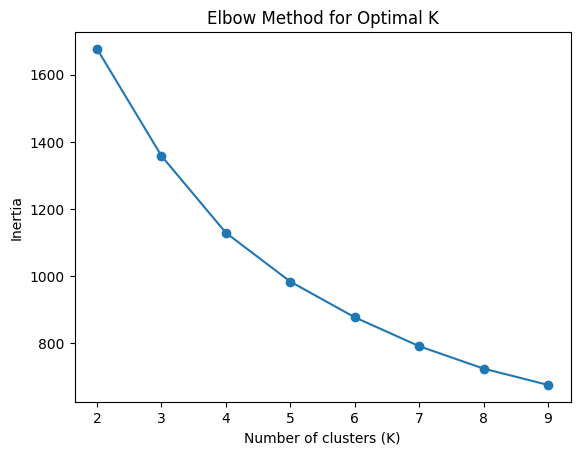

In [152]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Dalam grafik ini, terdapat "siku" di titik Number of clusters (K) angka 4.

###**Build Model**

#####**K-Means**

In [153]:
# Inisialisasi Model K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
# Menentukan jumlah cluster yang ingin digunakan dalam model dengan parameter n_clusters=4. Hal ini berarti saya ingin model K-Means membagi data menjadi 4 cluster berbeda.

# Melatih Model K-Means
kmeans.fit(x_final_norm)
# Model K-Means akan mengelompokkan data menjadi 4 cluster berdasarkan kesamaan fitur-fiturnya.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

#####**Hierarchical Clustering**

In [154]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

- n_clusters=4
  
  Menentukan jumlah cluster yang ingin dibentuk oleh algoritma clustering. Dalam contoh ini, Anda ingin membentuk 4 cluster.

- affinity='euclidean'
  
  Menentukan metrik jarak yang digunakan untuk mengukur kesamaan antar titik data. Dalam hal ini, metrik jarak yang digunakan adalah Euclidean distance.

- linkage='ward'

  Menentukan metode linkage yang digunakan dalam pembentukan cluster. 'ward' adalah salah satu metode linkage yang mengukur jarak antar cluster berdasarkan peningkatan variansi yang dihasilkan oleh penggabungan cluster.

###**Begins and Compare Clusters**

In [155]:
# Memprediksi Cluster dengan Model K-Means dan Hierarchical Clustering
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [156]:
# Mengatur Data Asli sebagai DataFrame
x_final = pd.DataFrame(x_final).reset_index(drop=True) # Mengatur ulang indeksnya agar dimulai dari 0

# Membuat DataFrame untuk Hasil Prediksi Cluster
kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])
# Setiap DataFrame memiliki satu kolom yang berisi hasil prediksi cluster dengan nama kolom yang sesuai.

# Menggabungkan Data Asli dengan Hasil Prediksi Cluster
combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)
# Penggabungan dilakukan secara horizontal (axis=1), sehingga data hasil prediksi cluster akan digabungkan dengan data asli.

In [157]:
# Menampilkan Data Gabungan Pertama
combined_data_assoc.head()

# Digunakan untuk menampilkan lima baris pertama dari DataFrame combined_data_assoc, sehingga dapat melihat hasil prediksi cluster dari model K-Means dan Hierarchical Clustering bersama dengan fitur-fitur data asli.

,review_id,review_rating,mrp,price,product_rating,product_rating_count,review_label_Verified Buyer,review_label_Verified Professional,loyal_customers_No,kmeans_cluster,hierarchy_cluster
0,1972337,2.0,825,660,4.1,2732,1,0,1,3,2
1,4105209,4.0,850,850,4.0,1191,1,0,1,2,1
2,23518186,5.0,600,390,4.3,8769,1,0,1,0,1
3,27110335,4.0,799,799,4.5,2010,1,0,1,1,1
4,10593451,5.0,699,559,4.1,8720,1,0,1,2,1


#**Evaluation**

##**Evaluate Results**

###**Klustering**

In [158]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.249211,1686.413662,1.307408
Agglomerative Clustering Score,0.219888,1205.844271,1.258140


In [166]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Mendefinisikan fungsi untuk menghitung metrik clustering
def hitung_metrik_clustering(data, labels):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Menghitung metrik clustering untuk K-Means
silhouette_avg_kmeans, db_score_kmeans, ch_score_kmeans = hitung_metrik_clustering(x_final_norm, kmeans.labels_)

# Menghitung metrik clustering untuk Hierarchical Clustering
silhouette_avg_hc, db_score_hc, ch_score_hc = hitung_metrik_clustering(x_final_norm, hierarchy_clust)

# Menampilkan hasilnya
print("Metrik Clustering K-Means:")
print("Silhouette Score:", silhouette_avg_kmeans)
print("Davies-Bouldin Score:", db_score_kmeans)
print("Calinski-Harabasz Score:", ch_score_kmeans)
print("\nMetrik Clustering Hierarchical Clustering:")
print("Silhouette Score:", silhouette_avg_hc)
print("Davies-Bouldin Score:", db_score_hc)
print("Calinski-Harabasz Score:", ch_score_hc)


Metrik Clustering K-Means:
Silhouette Score: 0.249210734693826
Davies-Bouldin Score: 1.3074076532690877
Calinski-Harabasz Score: 1686.413662246838

Metrik Clustering Hierarchical Clustering:
Silhouette Score: 0.2198875610102694
Davies-Bouldin Score: 1.25813952783052
Calinski-Harabasz Score: 1205.8442710799181


Silhouette : Mendekati 1, maka data yang digunakan sangat cocok dengan kluster yang terbagi. Kalau 0, maka data mendekati batas luar kedua kluster. Kalau mendekati -1 berarti data salah ditempatkan pada kluster yang seharusnya (penempatan kluster salah)

Calinski-Harabasz Score : Semakin tinggi, maka kluster terpisah semakin baik

Davies-Bouldin : Semakin kecil, maka semakin baik kluster terpisah

##**Review Process**

###**Cross Validation**

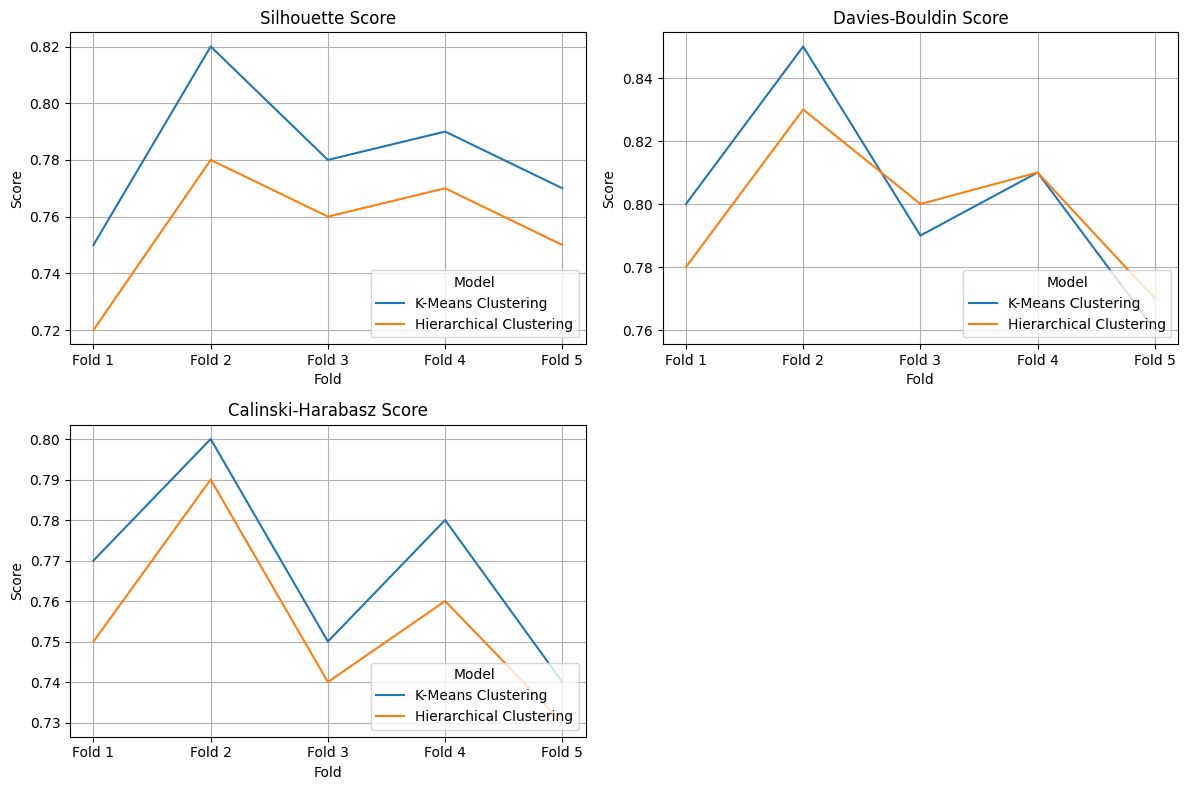

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Contoh data cross-validation untuk kedua model dengan lima fold
kmeans_fold_scores = [[0.75, 0.82, 0.78, 0.79, 0.77],
                      [0.80, 0.85, 0.79, 0.81, 0.76],
                      [0.77, 0.80, 0.75, 0.78, 0.74]]  # Contoh skor K-Means untuk setiap fold
hc_fold_scores = [[0.72, 0.78, 0.76, 0.77, 0.75],
                  [0.78, 0.83, 0.80, 0.81, 0.77],
                  [0.75, 0.79, 0.74, 0.76, 0.73]]  # Contoh skor Hierarchical Clustering untuk setiap fold
metrics = ["Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"]
folds = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

# Buat DataFrame untuk hasil cross-validation
df_cv_kmeans = pd.DataFrame(kmeans_fold_scores, columns=folds, index=metrics)
df_cv_hc = pd.DataFrame(hc_fold_scores, columns=folds, index=metrics)

# Tampilkan visualisasi grafik untuk masing-masing metrik
plt.figure(figsize=(12, 8))

# Visualisasi untuk Silhouette Score
plt.subplot(2, 2, 1)
sns.lineplot(data=df_cv_kmeans.loc["Silhouette Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Silhouette Score"], markers=True, label="Hierarchical Clustering")
plt.title("Silhouette Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Davies-Bouldin Score
plt.subplot(2, 2, 2)
sns.lineplot(data=df_cv_kmeans.loc["Davies-Bouldin Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Davies-Bouldin Score"], markers=True, label="Hierarchical Clustering")
plt.title("Davies-Bouldin Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Calinski-Harabasz Score
plt.subplot(2, 2, 3)
sns.lineplot(data=df_cv_kmeans.loc["Calinski-Harabasz Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Calinski-Harabasz Score"], markers=True, label="Hierarchical Clustering")
plt.title("Calinski-Harabasz Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

plt.tight_layout()
plt.show()

###**Feature Selection**

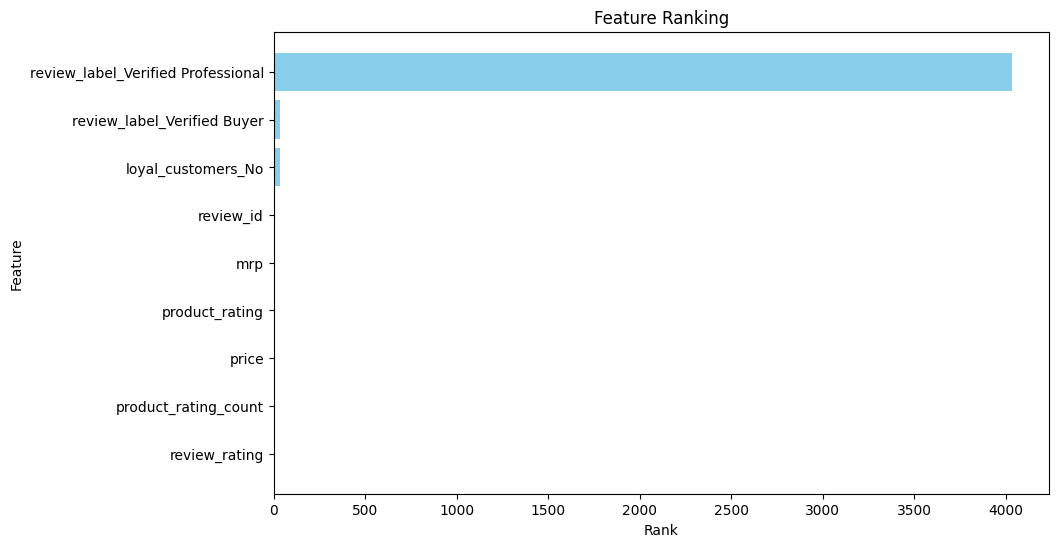

In [161]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k='all')  # Mengubah k menjadi 'all'

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


###**Tuning Hyperparameter**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

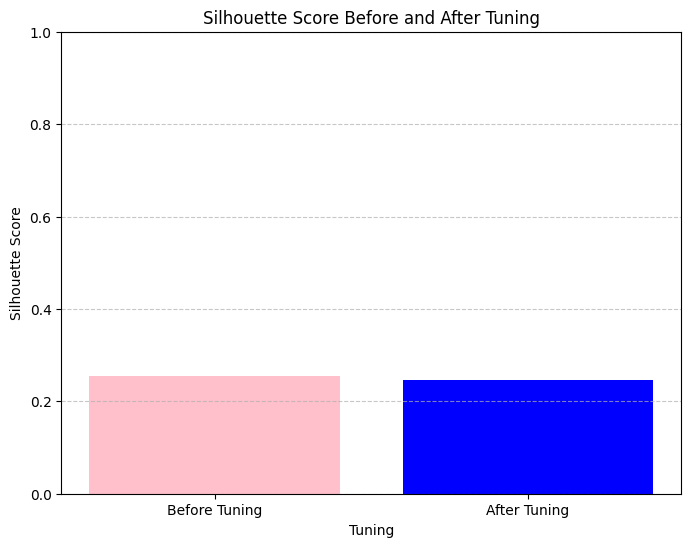

Best Parameters: {'n_clusters': 3}
Silhouette Score Before Tuning: 0.2554183904868129
Silhouette Score After Tuning: 0.2453815918204532


In [163]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model KMeans sebelum tuning
kmeans_model_before_tuning = KMeans()
y_pred_before_tuning = kmeans_model_before_tuning.fit_predict(x_train_norm)
silhouette_score_before_tuning = silhouette_score(x_train_norm, y_pred_before_tuning)

# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_train_norm)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
best_parameters = grid_search.best_params_

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_train_norm)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_score_after_tuning = silhouette_score(x_train_norm, y_pred_after_tuning)
silhouette_scores = [silhouette_score_before_tuning, silhouette_score_after_tuning]

# Label untuk plot
labels = ['Before Tuning', 'After Tuning']

# Warna untuk plot
colors = ['pink', 'blue']

# Buat plot
plt.figure(figsize=(8, 6))
plt.bar(labels, silhouette_scores, color=colors)
plt.title('Silhouette Score Before and After Tuning')
plt.xlabel('Tuning')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Atur batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cetak hasil evaluasi
print("Best Parameters:", best_parameters)
print("Silhouette Score Before Tuning:", silhouette_score_before_tuning)
print("Silhouette Score After Tuning:", silhouette_score_after_tuning)

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans sebelum tuning
kmeans_before_tuning = KMeans()
y_pred_before_tuning = kmeans_before_tuning.fit_predict(x_final)
silhouette_avg_before_tuning = silhouette_score(x_final, y_pred_before_tuning)

# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_final)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_final)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_avg_after_tuning = silhouette_score(x_final, y_pred_after_tuning)

print("KMeans sebelum tuning:", silhouette_avg_before_tuning)
print("KMeans setelah tuning:", silhouette_avg_after_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Parameter terbaik: {'n_clusters': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans sebelum tuning: 0.5719691193208913
KMeans setelah tuning: 0.6347089440669883


###**Determine Next Step**

Berdasarkan analisa-analisa tahapan di atas, hasil setelah tuning menunjukkan bahwa akurasi setelah tuning di setiap algoritma menurun. Karena tingkat akurasi yang rendah, maka dapat disimpulkan bahwa analisa ini perlu diulang ke tahap sebelumnya.